In [ ]:
# Connecting with the spotify library (spotipy) using credentials from the Spotify API 

In [4]:
import spotipy

In [5]:
from spotipy.oauth2 import SpotifyOAuth

In [ ]:
# client_id and client_secret is hidden. It can be obtained from "https://developer.spotify.com/dashboard" on creating the webApp.

In [8]:
# client_id = ""
# client_secret = ""

# redirect_uri = "http://localhost:9000"

In [9]:
scope = "user-read-recently-played"
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope,
                                               client_id=client_id,
                                              client_secret=client_secret,
                                              redirect_uri=redirect_uri))

In [ ]:
# Artist ID can be obtained from the url of their spotify web page.

In [15]:
taylor_swift = sp.artist("06HL4z0CvFAxyc27GXpf02")

In [16]:
taylor_swift

{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
 'followers': {'href': None, 'total': 105166598},
 'genres': ['pop'],
 'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
 'id': '06HL4z0CvFAxyc27GXpf02',
 'images': [{'url': 'https://i.scdn.co/image/ab6761610000e5eb859e4c14fa59296c8649e0e4',
   'height': 640,
   'width': 640},
  {'url': 'https://i.scdn.co/image/ab67616100005174859e4c14fa59296c8649e0e4',
   'height': 320,
   'width': 320},
  {'url': 'https://i.scdn.co/image/ab6761610000f178859e4c14fa59296c8649e0e4',
   'height': 160,
   'width': 160}],
 'name': 'Taylor Swift',
 'popularity': 100,
 'type': 'artist',
 'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}

In [ ]:
# Extracting all albums and their features and cleaning up for required usecases.

In [17]:
taylor_albums = sp.artist_albums(taylor_swift['id'],limit=50)

In [18]:
for album in taylor_albums['items']:
    print(f"Album: {album['name']} -- ID: {album['id']}")

Album: 1989 (Taylor's Version) [Deluxe] -- ID: 1o59UpKw81iHR0HPiSkJR0
Album: 1989 (Taylor's Version) -- ID: 64LU4c1nfjz1t4VnGhagcg
Album: Speak Now (Taylor's Version) -- ID: 5AEDGbliTTfjOB8TSm1sxt
Album: Midnights (The Til Dawn Edition) -- ID: 1fnJ7k0bllNfL1kVdNVW1A
Album: Midnights (3am Edition) -- ID: 3lS1y25WAhcqJDATJK70Mq
Album: Midnights -- ID: 151w1FgRZfnKZA9FEcg9Z3
Album: Red (Taylor's Version) -- ID: 6kZ42qRrzov54LcAk4onW9
Album: Fearless (Taylor's Version) -- ID: 4hDok0OAJd57SGIT8xuWJH
Album: evermore (deluxe version) -- ID: 6AORtDjduMM3bupSWzbTSG
Album: evermore -- ID: 2Xoteh7uEpea4TohMxjtaq
Album: folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition] -- ID: 0PZ7lAru5FDFHuirTkWe9Z
Album: folklore (deluxe version) -- ID: 1pzvBxYgT6OVwJLtHkrdQK
Album: folklore -- ID: 2fenSS68JI1h4Fo296JfGr
Album: Lover -- ID: 1NAmidJlEaVgA3MpcPFYGq
Album: reputation -- ID: 6DEjYFkNZh67HP7R9PSZvv
Album: reputation Stadium Tour Surprise Song Playlist -- ID: 1MPAXuTVL

In [29]:
album_names = []
albums = []

for album in taylor_albums['items']:
    album_name = album['name']
    album_id = album['id']
    # Removing the duplicates
    if album_name[:3] not in album_names and "remix" not in album_name and "Karaoke" not in album_name and "Live" not in album_name:
        album_names.append(album_name[:3] )
        albums.append((album_name,album_id))

In [20]:
albums

[("1989 (Taylor's Version) [Deluxe]", '1o59UpKw81iHR0HPiSkJR0'),
 ("Speak Now (Taylor's Version)", '5AEDGbliTTfjOB8TSm1sxt'),
 ('Midnights (The Til Dawn Edition)', '1fnJ7k0bllNfL1kVdNVW1A'),
 ("Red (Taylor's Version)", '6kZ42qRrzov54LcAk4onW9'),
 ("Fearless (Taylor's Version)", '4hDok0OAJd57SGIT8xuWJH'),
 ('evermore (deluxe version)', '6AORtDjduMM3bupSWzbTSG'),
 ('folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]',
  '0PZ7lAru5FDFHuirTkWe9Z'),
 ('Lover', '1NAmidJlEaVgA3MpcPFYGq'),
 ('reputation', '6DEjYFkNZh67HP7R9PSZvv'),
 ('Taylor Swift', '5eyZZoQEFQWRHkV2xgAeBw'),
 ("You're Losing Me (From The Vault)", '5q3jthpn2h59P7pe2gmAl7'),
 ('The Cruelest Summer', '12A1Byk8EpqzaHSw12nKyW'),
 ('Lavender Haze (Acoustic Version)', '6eKdbTio5viiwJ5FE5J8wU'),
 ('Anti-Hero (Acoustic Version)', '5vgWXUueeEU2labRz6TlNv'),
 ('Carolina (From The Motion Picture “Where The Crawdads Sing”)',
  '5Bwg2XxrjTlrNy6BC7KQZf'),
 ('All Too Well (10 Minute Version) (The Short Film)'

In [22]:
final_album_list = albums[:-14]
# removing the singles and EPs

In [23]:
final_album_list

[("1989 (Taylor's Version) [Deluxe]", '1o59UpKw81iHR0HPiSkJR0'),
 ("Speak Now (Taylor's Version)", '5AEDGbliTTfjOB8TSm1sxt'),
 ('Midnights (The Til Dawn Edition)', '1fnJ7k0bllNfL1kVdNVW1A'),
 ("Red (Taylor's Version)", '6kZ42qRrzov54LcAk4onW9'),
 ("Fearless (Taylor's Version)", '4hDok0OAJd57SGIT8xuWJH'),
 ('evermore (deluxe version)', '6AORtDjduMM3bupSWzbTSG'),
 ('folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]',
  '0PZ7lAru5FDFHuirTkWe9Z'),
 ('Lover', '1NAmidJlEaVgA3MpcPFYGq'),
 ('reputation', '6DEjYFkNZh67HP7R9PSZvv'),
 ('Taylor Swift', '5eyZZoQEFQWRHkV2xgAeBw')]

In [24]:
taylor_song_ids = []

for album_name, album_id in final_album_list:
    tracks = sp.album_tracks(album_id)['items']
    for track in tracks:
        track_name = track['name']
        track_id = track['id']
        taylor_song_ids.append((album_name,album_id,track_name,track_id))

In [25]:
taylor_song_ids[0]

("1989 (Taylor's Version) [Deluxe]",
 '1o59UpKw81iHR0HPiSkJR0',
 "Welcome To New York (Taylor's Version)",
 '4WUepByoeqcedHoYhSNHRt')

In [ ]:
# We can test out the API and get the machine generated features for songs.

In [26]:
import pandas as pd

In [27]:
# Test out the above song
features = sp.audio_features(tracks=['4WUepByoeqcedHoYhSNHRt'])


In [28]:
features

[{'danceability': 0.757,
  'energy': 0.61,
  'key': 7,
  'loudness': -4.84,
  'mode': 1,
  'speechiness': 0.0327,
  'acousticness': 0.00942,
  'instrumentalness': 3.66e-05,
  'liveness': 0.367,
  'valence': 0.685,
  'tempo': 116.998,
  'type': 'audio_features',
  'id': '4WUepByoeqcedHoYhSNHRt',
  'uri': 'spotify:track:4WUepByoeqcedHoYhSNHRt',
  'track_href': 'https://api.spotify.com/v1/tracks/4WUepByoeqcedHoYhSNHRt',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4WUepByoeqcedHoYhSNHRt',
  'duration_ms': 212600,
  'time_signature': 4}]

In [ ]:
# For better display we can create a dataframe

In [30]:
df = pd.DataFrame()

for album_name,album_id,track_name, track_id in taylor_song_ids:
    features = sp.audio_features(tracks=[track_id])[0]
    features['album_name'] = album_name
    features['album_id'] = album_id
    features['track_name'] = track_name
    ser = pd.Series(features)
    df = pd.concat([df,ser],axis=1)


In [31]:
df = df.transpose().set_index('id')
df.head()[['danceability', 'energy', 'key', 'acousticness','album_name','track_name']]

,danceability,energy,key,acousticness,album_name,track_name
id,,,,,,
4WUepByoeqcedHoYhSNHRt,0.757,0.61,7,0.00942,1989 (Taylor's Version) [Deluxe],Welcome To New York (Taylor's Version)
0108kcWLnn2HlH2kedi1gn,0.733,0.733,0,0.0885,1989 (Taylor's Version) [Deluxe],Blank Space (Taylor's Version)
3Vpk1hfMAQme8VJ0SNRSkd,0.511,0.822,11,0.000421,1989 (Taylor's Version) [Deluxe],Style (Taylor's Version)
1OcSfkeCg9hRC2sFKB4IMJ,0.545,0.885,0,0.000537,1989 (Taylor's Version) [Deluxe],Out Of The Woods (Taylor's Version)
2k0ZEeAqzvYMcx9Qt5aClQ,0.588,0.721,0,0.000656,1989 (Taylor's Version) [Deluxe],All You Had To Do Was Stay (Taylor's Version)


In [ ]:
# We can modify further to only view the music features

In [32]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'album_name', 'album_id', 'track_name'],
      dtype='object')

In [33]:
data_features = df.drop(['type', 'uri', 'track_href', 'analysis_url','album_name', 'album_id', 'track_name'],axis=1)

In [34]:
for col in data_features.columns:
    data_features[col] = data_features[col].apply(float)

In [35]:
data_features.describe()[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness']]

,danceability,energy,key,loudness,mode,speechiness,acousticness
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,0.582658,0.557194,4.513514,-7.761851,0.896396,0.055868,0.349125
std,0.112628,0.187714,3.399134,2.847243,0.305434,0.053405,0.346291
min,0.292000,0.131000,0.000000,-15.489000,0.000000,0.023100,0.000191
25%,0.511000,0.410500,1.250000,-9.864750,1.000000,0.030800,0.032000
50%,0.591500,0.572500,5.000000,-7.120500,1.000000,0.038250,0.203500
75%,0.657000,0.703750,7.000000,-5.711000,1.000000,0.057050,0.726750
max,0.897000,0.934000,11.000000,-1.909000,1.000000,0.519000,0.971000


In [ ]:
# We can now create various plots with pairs of features varying on changing values across her albums

In [38]:
import matplotlib.pyplot as plt

In [40]:
import seaborn as sns

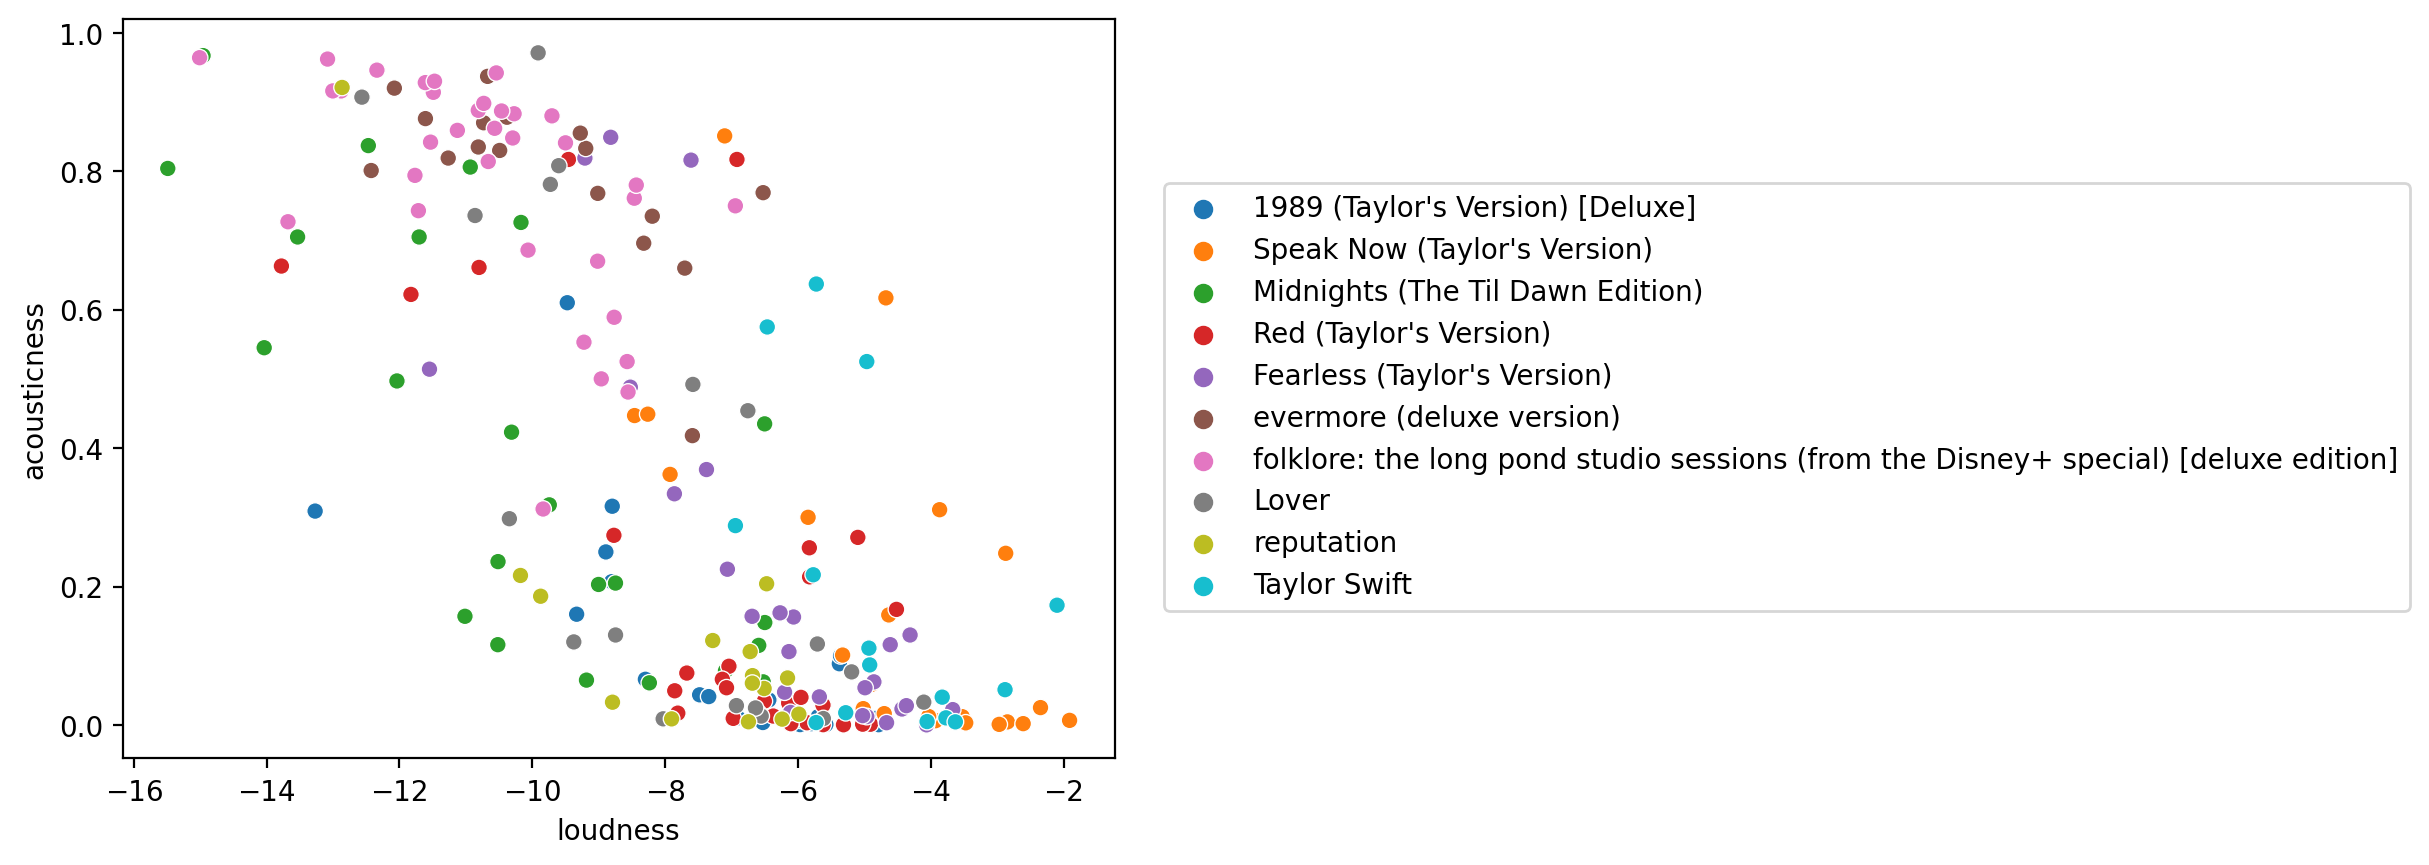

In [41]:
plt.figure(dpi=200)
sns.scatterplot(x='loudness',y='acousticness',data=data_features,hue=df['album_name'])
plt.legend(loc=(1.05,0.2))

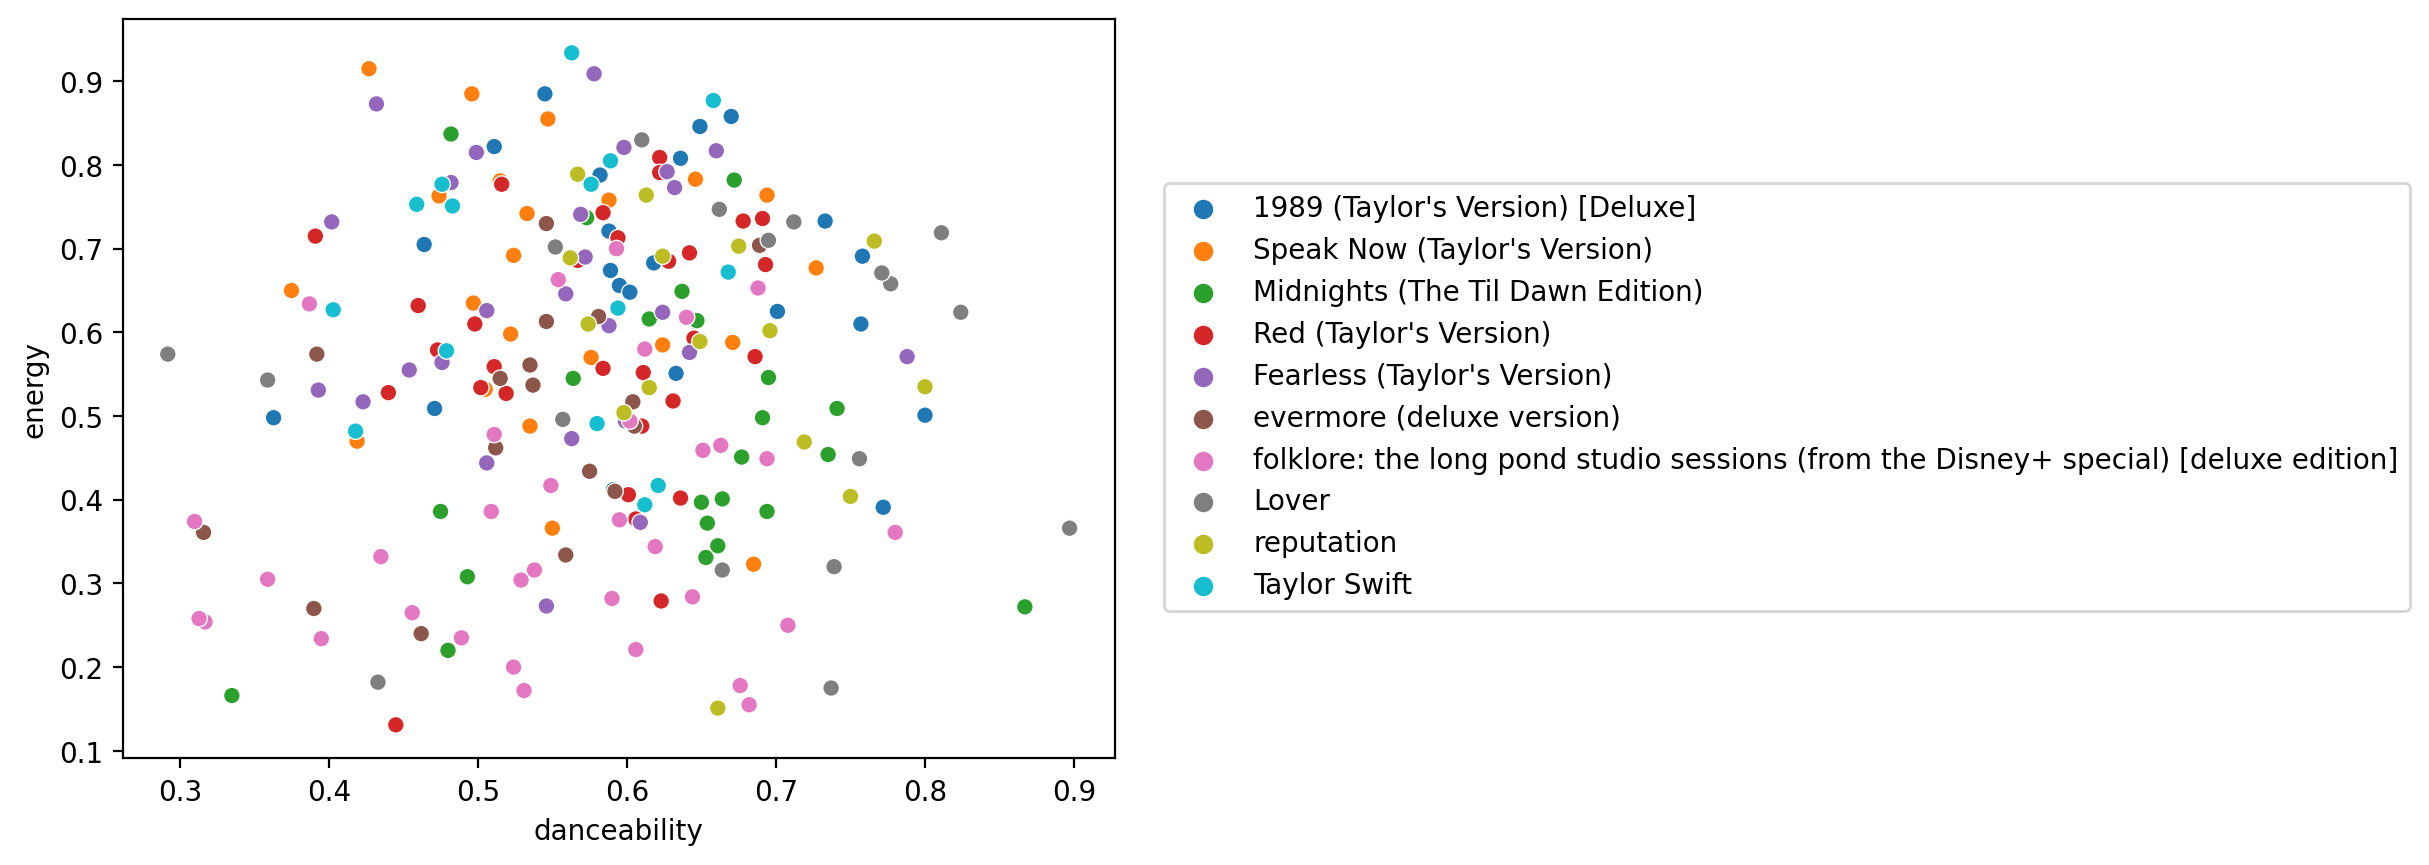

In [42]:
plt.figure(dpi=200)
sns.scatterplot(x='danceability',y='energy',data=data_features,hue=df['album_name'])
plt.legend(loc=(1.05,0.2))